In [30]:
# ANALISIS DEL AÑO 2017

In [4]:
import numpy as np 
import pandas as pd

# plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
pev1 = pd.read_csv('properties/properati-AR-2017-01-01-properties-sell.csv')
pev2 = pd.read_csv('properties/properati-AR-2017-02-01-properties-sell.csv')
pev3 = pd.read_csv('properties/properati-AR-2017-03-01-properties-sell.csv')
pev4 = pd.read_csv('properties/properati-AR-2017-04-01-properties-sell.csv')
pev5 = pd.read_csv('properties/properati-AR-2017-05-01-properties-sell.csv')
pev6 = pd.read_csv('properties/properati-AR-2017-06-01-properties-sell.csv')
pev7 = pd.read_csv('properties/properati-AR-2017-07-01-properties-sell.csv')
pev8 = pd.read_csv('properties/properati-AR-2017-08-01-properties-sell.csv')


In [7]:
pevconc = pd.concat([pev1,pev2]).drop_duplicates().reset_index(drop=True)
pevconc = pd.concat([pevconc, pev3]).drop_duplicates().reset_index(drop=True)
pevconc = pd.concat([pevconc, pev4]).drop_duplicates().reset_index(drop=True)
pevconc = pd.concat([pevconc, pev5]).drop_duplicates().reset_index(drop=True)
pevconc = pd.concat([pevconc, pev6]).drop_duplicates().reset_index(drop=True)
pevconc = pd.concat([pevconc, pev7]).drop_duplicates().reset_index(drop=True)
pev = pd.concat([pevconc, pev8]).drop_duplicates().reset_index(drop=True)
pev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313616 entries, 0 to 313615
Data columns (total 27 columns):
id                            313616 non-null object
created_on                    313616 non-null object
operation                     313616 non-null object
property_type                 313616 non-null object
place_name                    313564 non-null object
place_with_parent_names       313616 non-null object
country_name                  313616 non-null object
state_name                    313616 non-null object
geonames_id                   264869 non-null float64
lat-lon                       223658 non-null object
lat                           223658 non-null float64
lon                           223658 non-null float64
price                         270169 non-null float64
currency                      267585 non-null object
price_aprox_local_currency    270169 non-null float64
price_aprox_usd               270169 non-null float64
surface_total_in_m2           21662

In [8]:
#Convertiremos la fecha de publicación
#Agregamos las series año y mes como columnas
def numero_de_mes_a_nombre(x):
    if x.month == 1: return '01 Enero'
    if x.month == 2: return '02 Febrero'
    if x.month == 3: return '03 Marzo'
    if x.month == 4: return '04 Abril'
    if x.month == 5: return '05 Mayo'
    if x.month == 6: return '06 Junio'
    if x.month == 7: return '07 Julio'
    if x.month == 8: return '08 Agosto'
    if x.month == 9: return '09 Septiembre'
    if x.month == 10: return '10 Octubre'
    if x.month == 11: return '11 Noviembre'
    if x.month == 12: return '12 Diciembre'

import calendar
pev['Date'] = pd.to_datetime(pev['created_on'])
pev['Año'] = pev['Date'].map(lambda x:x.year)
pev['Mes'] = pev['Date'].map(numero_de_mes_a_nombre)


In [9]:
#Me quedo con capital federal y G.B.A
pevTP = pev.loc[pev.place_with_parent_names.str.contains('Capital Federal') | pev.place_with_parent_names.str.contains('G.B.A'), :]
pevTP.head(11)

,id,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,floor,rooms,expenses,properati_url,description,title,image_thumbnail,Date,Año,Mes
1,d91f4f90ae4c28aff9d696dbee7e8d4fac154bc8,2016-07-01,sell,apartment,Barrio Norte,|Argentina|Capital Federal|Barrio Norte|,Argentina,Capital Federal,3436109.0,"-34.592891,-58.408693",...,1.0,4.0,NaN,http://www.properati.com.ar/zo17_venta_departa...,Corredor Responsable: Uno Bienes Raices SRL - ...,Hermoso Piso en Edificio de Estilo.4amb con dep.,https://thumbs4.properati.com/4/bzYZriZno3lXfC...,2016-07-01,2016,07 Julio
5,201045bbf92f899b8680e15c0150cade5f9356da,2016-07-01,sell,PH,Manuel B Gonnet,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|Man...,Argentina,Bs.As. G.B.A. Zona Sur,NaN,"-34.898361,-58.008188",...,NaN,4.0,NaN,http://www.properati.com.ar/zo25_venta_ph_la-p...,Corredor Responsable: Mauro Perri - CDCPDJLP 7...,Duplex en Gonnet,https://thumbs4.properati.com/5/aiKEhatxLY0eEw...,2016-07-01,2016,07 Julio
6,ee91e0f6610207f559a531e0835b9e00b1b3d350,2016-07-01,sell,house,City Bell,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|Cit...,Argentina,Bs.As. G.B.A. Zona Sur,3435379.0,"-34.877834,-58.083429",...,NaN,5.0,NaN,http://www.properati.com.ar/zo27_venta_casa_la...,Corredor Responsable: Mauro Perri - CDCPDJLP 7...,Casa en calle 446 - 24 y 25,https://thumbs4.properati.com/7/JL807rO6nv2X52...,2016-07-01,2016,07 Julio
12,20c2ce54242e59c55d48d225d762b2b550de8f81,2016-07-01,sell,apartment,Lomas de Zamora,|Argentina|Bs.As. G.B.A. Zona Sur|Lomas de Zam...,Argentina,Bs.As. G.B.A. Zona Sur,NaN,"-34.7491604,-58.4076943",...,NaN,2.0,NaN,http://www.properati.com.ar/zo55_alquiler_depa...,Departamento 2 ambientes con cocheraAmplio com...,DEPARTAMENTO EN VENTA,https://thumbs4.properati.com/9/sOcq27h1RCdftW...,2016-07-01,2016,07 Julio
13,d8696751ed4eeb3e52dd3fde15d13a23e4b3db4a,2016-07-01,sell,apartment,Banfield,|Argentina|Bs.As. G.B.A. Zona Sur|Lomas de Zam...,Argentina,Bs.As. G.B.A. Zona Sur,3436152.0,"-34.7416084,-58.3878096",...,NaN,NaN,NaN,http://www.properati.com.ar/zo57_venta_departa...,Complejo de viviendas multifamiliar.Cocina-com...,DEPARTAMENTO EN VENTA,https://thumbs4.properati.com/8/bABnf1d2f1Anyf...,2016-07-01,2016,07 Julio
14,14cabaf5b67a50b7b6b2399eb4e2107dde5de5e4,2016-07-01,sell,house,San Justo,|Argentina|Bs.As. G.B.A. Zona Oeste|La Matanza...,Argentina,Bs.As. G.B.A. Zona Oeste,3428775.0,"-34.6783888,-58.5523983",...,NaN,6.0,NaN,http://www.properati.com.ar/zo5b_venta_casa_sa...,En planta baja al frente departamento de 3 amb...,CASA EN VENTA,https://thumbs4.properati.com/7/qTw1BLhccB-d0w...,2016-07-01,2016,07 Julio
15,b671feef9c7c645ad2cda37743a191263bf2c250,2016-07-01,sell,house,San Justo,|Argentina|Bs.As. G.B.A. Zona Oeste|La Matanza...,Argentina,Bs.As. G.B.A. Zona Oeste,3428775.0,"-34.695568,-58.5391547",...,NaN,3.0,NaN,http://www.properati.com.ar/zo5v_venta_casa_sa...,Es una casa de tres ambientes que cuenta con g...,CASA EN VENTA,https://thumbs4.properati.com/3/aquVoAdEYmt6s4...,2016-07-01,2016,07 Julio
16,83b5b4764dff69c3717ae551194ddcf5c92c4739,2016-07-01,sell,apartment,San Justo,|Argentina|Bs.As. G.B.A. Zona Oeste|La Matanza...,Argentina,Bs.As. G.B.A. Zona Oeste,3428775.0,"-34.6802468,-58.5533474",...,1.0,2.0,NaN,http://www.properati.com.ar/zo5w_venta_departa...,Es un departamento SEMIPISO de dos ambientes a...,DEPARTAMENTO EN VENTA,https://thumbs4.properati.com/6/8anLcJZXpiGesP...,2016-07-01,2016,07 Julio
17,76935f2afc33629edeffb01251d83ea3f22f1277,2016-07-01,sell,apartment,San Justo,|Argentina|Bs.As. G.B.A. Zona Oeste|La Matanza...,Argentina,Bs.As. G.B.A. Zona Oeste,3428775.0,"-34.6802468,-58.5533474",...,2.0,2.0,NaN,http://www.properati.com.ar/zo5x_venta_departa...,Es un departamento SEMIPISO de dos ambientes a...,DEPARTAMENTO EN VENTA,https://thumbs4.properati.com/0/xftG6VhcM2COSx...,2016-07-01,2016,07 Julio
18,0b62bdbd15d889155329f5db3cd92f9ae4e30769,2016-07-01,sell,apartment,San Justo,|Argentina|Bs.As. G.B.A. Zona O

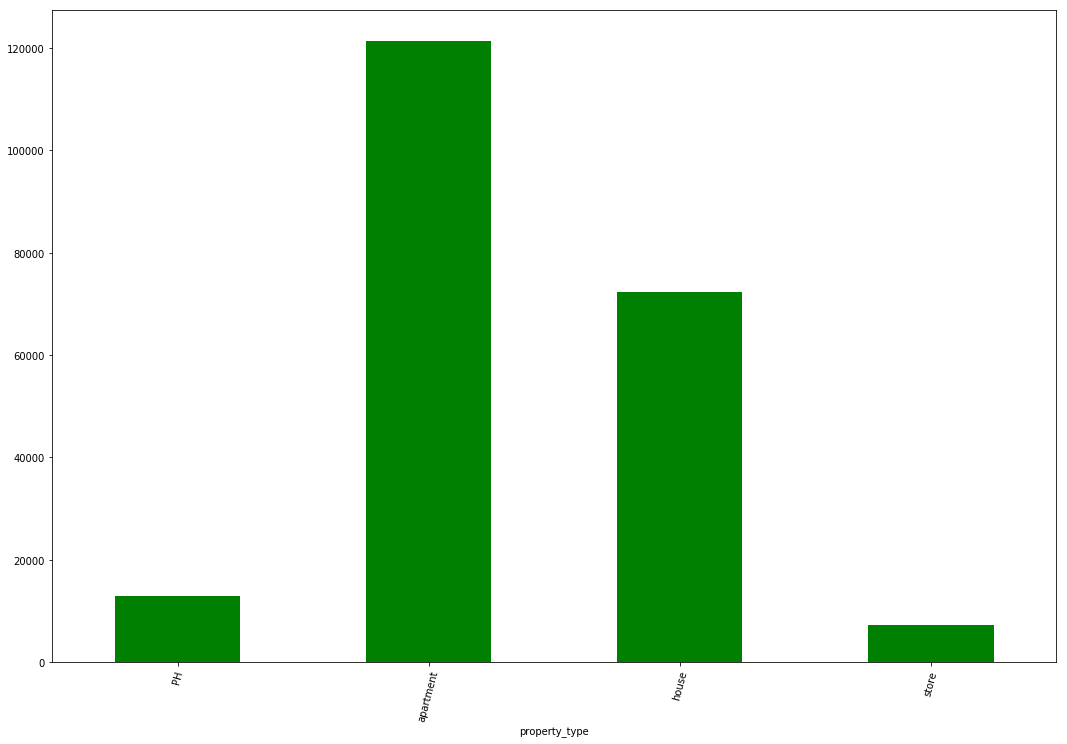

In [10]:
#Tipo de propiedad que mas se puso en venta
pevTP[['Mes', 'property_type']].groupby('property_type').size().\
    plot(kind='bar', color='green', rot=75, figsize=(18,12))
plt.show()

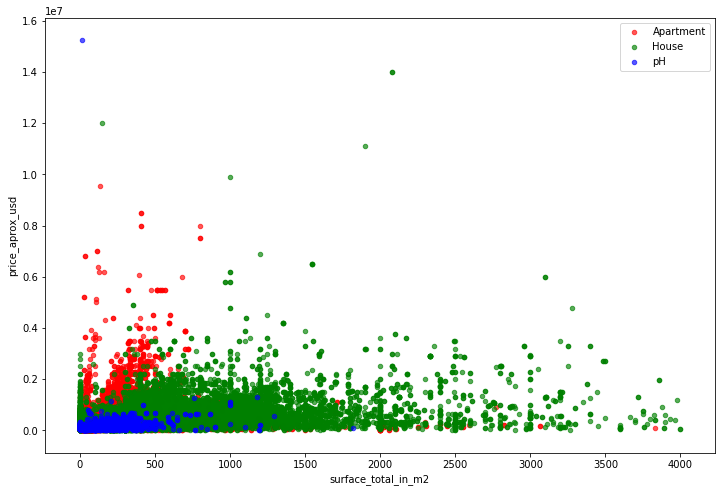

In [11]:
#LO DEJO PORQUE ME COSTO UN HUEVO

pevINFO = pevTP.loc[(pevTP.surface_total_in_m2 < 4000) & (pevTP.price_aprox_usd > 0), ['property_type', 'price_aprox_usd', 'surface_total_in_m2']]


pevINFO.loc[pevINFO.property_type.str.contains('apartment'), :].\
    plot.scatter(x='surface_total_in_m2', y='price_aprox_usd', color='Red', alpha=0.65, label='Apartment')
ax = plt.gca()
pevINFO.loc[pevINFO.property_type.str.contains('house'), :].\
    plot.scatter(x='surface_total_in_m2', y='price_aprox_usd', color='Green', alpha=0.65, ax = ax, label='House')
ax = plt.gca()
pevINFO.loc[pevINFO.property_type.str.contains('PH'), :].\
    plot.scatter(x='surface_total_in_m2', y='price_aprox_usd', color='Blue', alpha=0.65, ax = ax, label='pH', figsize=(12,8))
    





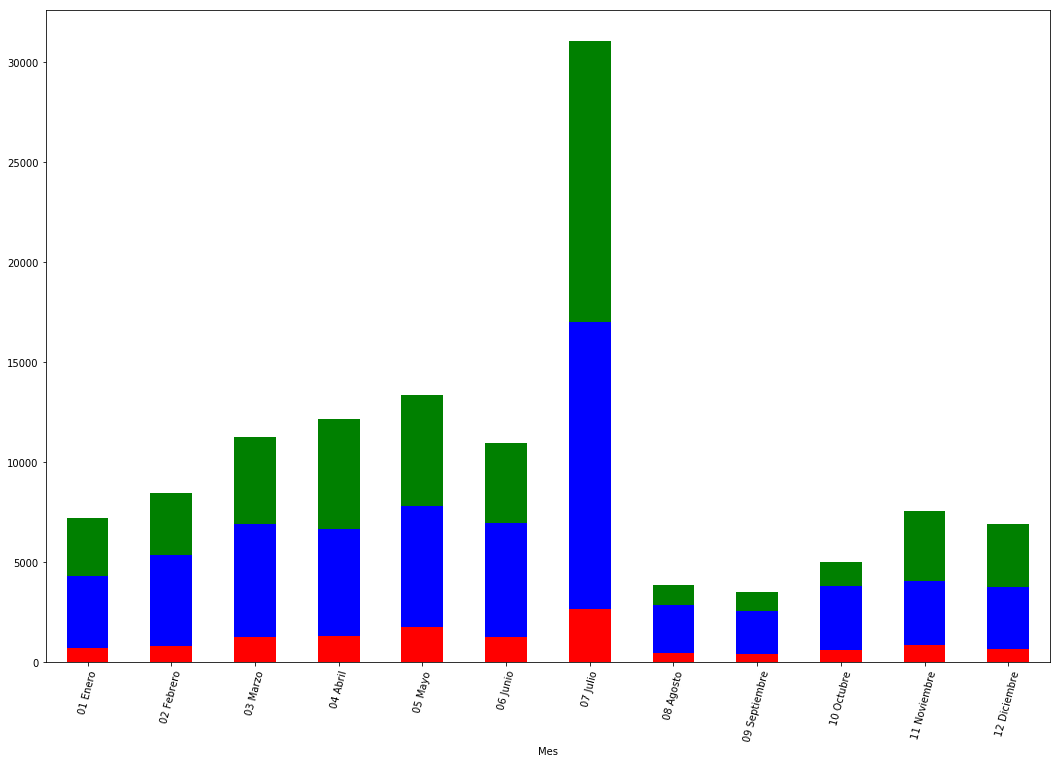

In [12]:
#Mes donde mas se ponen en venta los distintos tipos de propiedades
pevTP.loc[pevTP.property_type.str.contains('apartment'), ['Mes', 'property_type']].groupby('Mes').size().\
    plot(kind='bar', color='green', rot=75, figsize=(18,12))
ax = plt.gca()
pevTP.loc[pevTP.property_type.str.contains('house'), ['Mes', 'property_type']].groupby('Mes').size().\
    plot(kind='bar', color='blue', rot=75, figsize=(18,12))
ax = plt.gca()
pevTP.loc[pevTP.property_type.str.contains('PH'), ['Mes', 'property_type']].groupby('Mes').size().\
    plot(kind='bar', color='red', rot=75, figsize=(18,12))



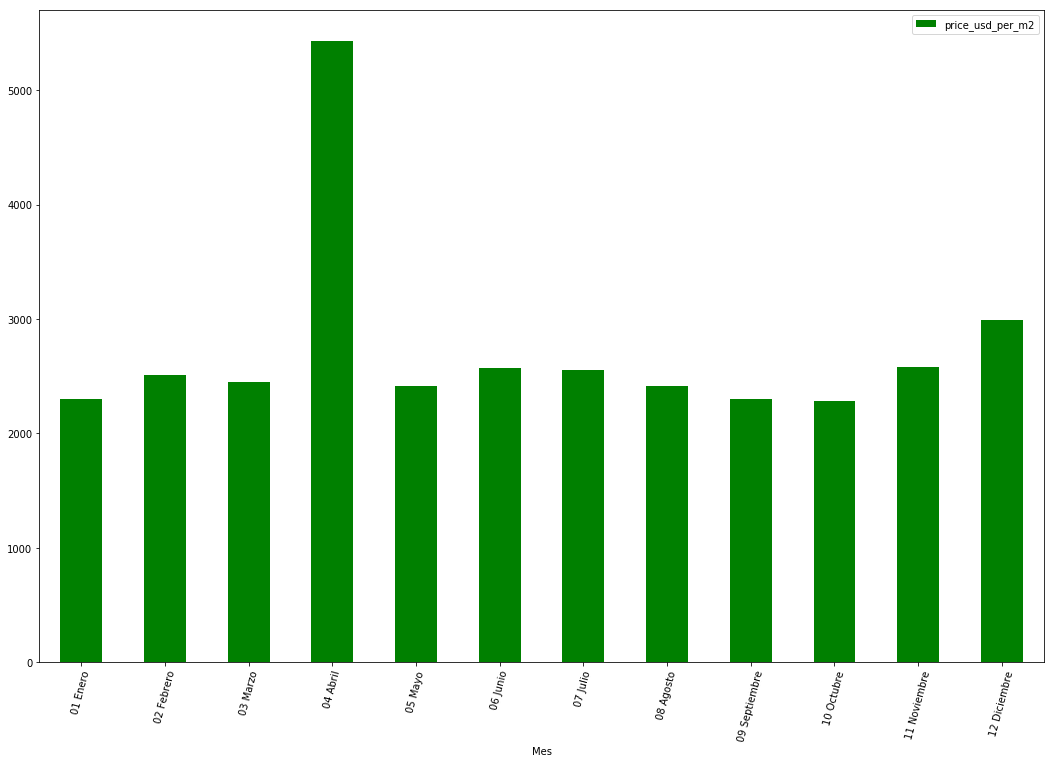

In [14]:
#Precio promedio de departamentos en venta por mes

deptos = pevTP.loc[pevTP.property_type.str.contains('apartment'), ['Mes', 'price_usd_per_m2']]
deptos.dropna(axis=0, how='any', inplace=True)
deptos.groupby('Mes').mean().plot(kind='bar', color='green', rot=75, figsize=(18,12))
plt.show()





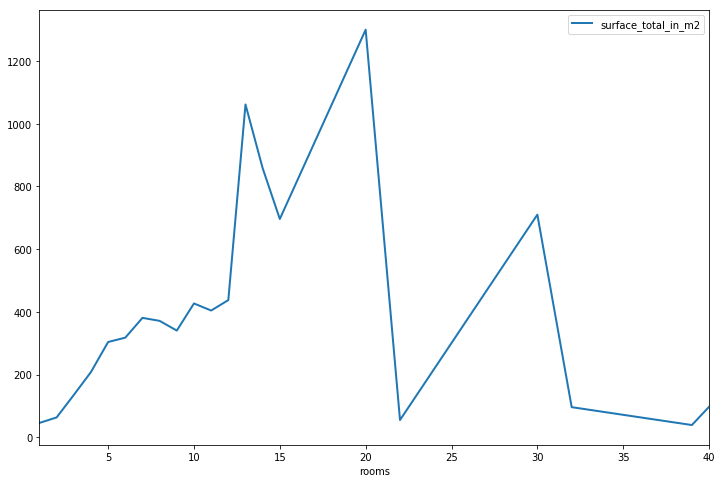

In [19]:
pevTP.loc[(pevTP.surface_total_in_m2 < 4000) & (pevTP.rooms > 0), ['surface_total_in_m2', 'rooms']].\
    groupby('rooms').mean().plot(linewidth=2,figsize=(12,8));
